<a href="https://colab.research.google.com/github/valesierrai/Analisis-Supervisado-para-el-AD/blob/main/Softmax.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#0. Cargamos Librerias

In [ ]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from PIL import Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Cargamos el archivo de etiquetas
labels_df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Aprendizaje Supervisado/Informacion.xlsx', header = None)

In [ ]:
#Visualizamos
labels_df.head()

,0,1
0,"Foto 20-09-24, 10 05 03 AM",orquidea
1,"Foto 20-09-24, 10 05 12 AM",orquidea
2,"Foto 20-09-24, 10 05 31 AM",flor
3,"Foto 20-09-24, 10 05 54 AM",flor
4,"Foto 20-09-24, 10 06 21 AM",flor


In [ ]:
#Separamos los nombres de los archivos de las etiquetas
filenames = labels_df[0].values
labels = labels_df[1].values

In [ ]:
from sklearn.preprocessing import LabelEncoder

#Codificamos las etiquetas

#Instanciamos el codificador
label_encoder = LabelEncoder()
#Aplicamos la codificación en las etiquetas
labels_encoded = label_encoder.fit_transform(labels)

array([1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [ ]:
#Aplicamos el one_hot_encoding para tener las salidas requeridas por el softmax
labels_one_hot = tf.keras.utils.to_categorical(labels_encoded, num_classes=2)

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

*Si es flor me puso 1,0

*Si es orquidea me puso 0,1

In [ ]:
#Ajustamos la resoulción de las imagenes para homogenizar los tamaños, quitar información no relevante, y bajar un poquito la carga computacional del procesamiento

#Definimos el tamaño
img_size = (128, 128)

In [ ]:
#Definimos una función de carga y procesamiento de las imágenes

def load_and_preprocess_image(filename, img_size):
  #abrimos y cargamos cada imagen en la variable img
  img = Image.open(filename)
  #cambiamos el tamaño de la imagen
  img = img.resize(img_size)
  #ponemos los valores de instensidad entre 0 y 1
  img = np.array(img).astype('float32')/255
  if img.shape[-1] == 4: #comprobamos si existe canal alfa
    img = img[...,:3]
  return img

In [ ]:
#Cargamos las imágenes desde nuestro sistema de archivos

#Agregamos la extensión a cada nombre de la imagen
filenames_with_extension = [fname + '.jpg' for fname in filenames]

#Definimos el directorio con las imágenes
image_dir = '/content/drive/MyDrive/Colab Notebooks/Aprendizaje Supervisado/Flores/'

#Cargamos las imágenes
images = np.array([load_and_preprocess_image(os.path.join(image_dir, fname), img_size) for fname in filenames_with_extension])

In [ ]:
images.shape

(35, 128, 128, 3)

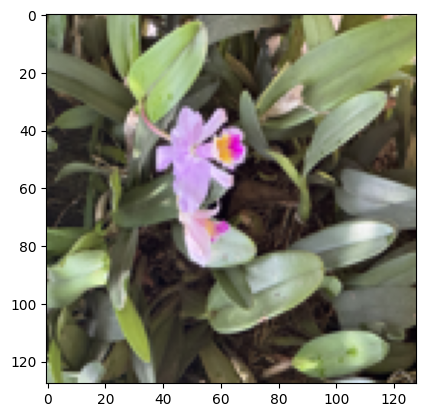

In [ ]:
#Si queremos visualizar las imágenes del conjunto de datos (no las matrices numéricas)
import matplotlib.pyplot as plt
plt.imshow(images[5,:,:,:])

In [ ]:
#Dividimos nuestro conjunto de imágenes en train y test
train_images, test_images, train_labels, test_labels = train_test_split(images, labels_one_hot, test_size=0.2, random_state=42)

In [ ]:
#Aplanamos las imágenes
train_images = train_images.reshape((train_images.shape[0], img_size[0]*img_size[1]*3))
test_images = test_images.reshape((test_images.shape[0], img_size[0]*img_size[1]*3))

In [ ]:
#Construimos el modelo de red neuronal

#Definimos que el modelo será secuencial (una copia después de la otra)
model = models.Sequential()

#Agregamos las capas de la red
model.add(layers.Dense(128, activation = 'relu', input_shape = (img_size[0]*img_size[1]*3,)))
model.add(layers.Dense(2, activation = 'softmax'))

In [ ]:
#Compilamos el modelo
model.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
#Entrenamos el modelo
history = model.fit(train_images, train_labels, epochs = 20, validation_data = (test_images, test_labels))

Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step - accuracy: 0.5714 - loss: 0.6164 - val_accuracy: 0.4286 - val_loss: 0.7469
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step - accuracy: 0.5714 - loss: 0.6077 - val_accuracy: 0.4286 - val_loss: 0.7382
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step - accuracy: 0.6071 - loss: 0.5991 - val_accuracy: 0.4286 - val_loss: 0.7684
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step - accuracy: 0.5714 - loss: 0.5937 - val_accuracy: 0.4286 - val_loss: 0.7317
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - accuracy: 0.6429 - loss: 0.5841 - val_accuracy: 0.4286 - val_loss: 0.8193
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step - accuracy: 0.5714 - loss: 0.5940 - val_accuracy: 0.4286 - val_loss: 0.7195
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - accuracy: 0.7857 - loss: 0.5758 - val_accuracy: 0.4286 - val_loss: 0.9078
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - accuracy: 0.5714 - loss: 0.6248 - val_accuracy: 0.2857 - val_loss:

In [ ]:
#Evaluamos el modelo
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5714 - loss: 0.6843
Test accuracy: 0.5714285969734192
